<a href="https://colab.research.google.com/github/Athugodage/TFM/blob/master/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Athugodage/TFM.git

Cloning into 'TFM'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [357]:
import pandas as pd

df = pd.read_excel('TFM/data.xlsx')


Вопросы:

1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных 
средств которых не просрочен.


In [33]:
july = df.loc[df.status == 'Июль 2021'].index
august = df.loc[df.status == 'Август 2021'].index
  
print(july[0], august[0])


258 369


In [66]:
df.iloc[july[0]:august[0]]

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
259,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-08-09 00:00:00
260,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-08-09 00:00:00
261,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,NaN,НЕТ,NaN
262,21.0,4313.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-09-17 00:00:00
263,24.0,19407.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-08-19 00:00:00
...,...,...,...,...,...,...,...,...
364,277.0,4878.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-08-03 00:00:00
365,281.0,11703.7,ОПЛАЧЕНО,Селиванов,текущая,NaN,оригинал,2021-08-13 00:00:00
366,284.0,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,NaN,НЕТ,NaN
367,286.0,4048.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-08-11 00:00:00


In [121]:
res = df.iloc[(july[0]+1):august[0]].groupby([df.status != 'ПРОСРОЧЕНО']).agg({'sum': 'sum'}) 
res

#  Ответ: 859896.47
#  1977.70 - это просроченные платежи. Как видим, в таблице как раз только один просроченный платеж на 1977.70

,sum
status,
False,1977.70
True,859896.47


2) Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком

In [144]:
import re


def f(x):
    if re.match('\w*\s\d{4}', x):
        global date
        date = x
        
    return date
 

df['period'] = df.status.apply(f)

In [148]:
df

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,period
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN,Май 2021
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00,Октябрь 2021
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN,Октябрь 2021
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN,Октябрь 2021
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00,Октябрь 2021


In [188]:
revenue = df.groupby(['period']).agg({'sum': 'sum'})
revenue = revenue.reindex(
    reversed(['Октябрь 2021', 'Сентябрь 2021', 'Август 2021', 'Июль 2021', 'Июнь 2021', 'Май 2021']))
revenue

,sum
period,
Май 2021,809572.19
Июнь 2021,810266.11
Июль 2021,861874.17
Август 2021,850435.79
Сентябрь 2021,820383.78
Октябрь 2021,1033148.39


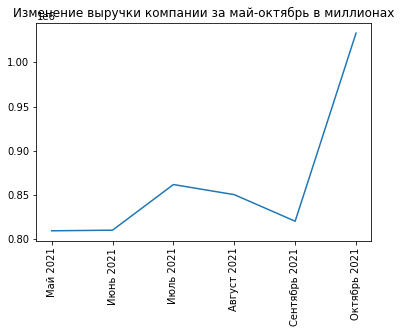

In [204]:
import matplotlib.pyplot as plt 


plt.plot(revenue)
plt.title('Изменение выручки компании за май-октябрь в миллионах')
plt.xticks(rotation=90)
plt.show()

3) Кто из менеджеров привлек для компании больше всего денежных средств в 
сентябре 2021?

In [247]:
managers = df[df.period == 'Сентябрь 2021'].groupby(['sale']).agg({'sum': 'sum'})
managers

,sum
sale,
Андреев,133652.50
Васильев,49895.45
Иванов,94770.60
Кузнецова,72228.40
Михайлов,4268.70
Петрова,149344.46
Смирнов,221525.70
Соколов,35183.50
Филимонова,59514.47


In [248]:

print(managers.sort_values(by=['sum'], ascending=[False]).iloc[0].name, 
      'привлек больше всего денежных средств в сентябре 2021')

# Ответ:  Смирнов

Смирнов привлек больше всего денежных средств в сентябре 2021


4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [278]:
sdelka = df[df.period == 'Октябрь 2021'].groupby(['new/current']).agg({'new/current': 'count'})
sdelka

,new/current
new/current,
новая,36
текущая,99


In [255]:
df[df.period == 'Октябрь 2021'].groupby(['new/current'])['client_id'].count()

#  Проверяем другим способом. Результат тот же
#  Ответ: тип сделок "текущая" (99 сделок)

new/current
новая      36
текущая    99
Name: client_id, dtype: int64

5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [293]:
df

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,period
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN,Май 2021
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00,Октябрь 2021
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN,Октябрь 2021
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN,Октябрь 2021
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00,Октябрь 2021


In [348]:
import re

def date2month(x):
    #  пришлось создать специальный фильтр для дат, так как формат не поддерживал
    #  pd.Timestamp

    x = str(x)
    if re.match('\w{4}-\w{2}-\w{2} \w{2}:\w{2}:\w{2}', x):
        
        return x[5:7]


df[df['receiving_date'].apply(date2month) == '06'].groupby(['document', 'period']).agg({'client_id': 'count'})

,,client_id
document,period,
оригинал,Май 2021,76


In [355]:
may_orig = df.loc[
       (df['document'] == 'оригинал') & 
       (df.period == 'Май 2021') & 
       (df['receiving_date'].apply(date2month) == '06')]

may_orig
#  Проверяем. Получилось 76 строк - правильно    


,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,period
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,Май 2021
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-08 00:00:00,Май 2021
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,NaN,оригинал,2021-06-23 00:00:00,Май 2021
10,28.0,10537.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-16 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...,...
120,266.0,3363.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-06-23 00:00:00,Май 2021
121,270.0,5288.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-06-07 00:00:00,Май 2021
122,273.0,10133.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-06-01 00:00:00,Май 2021
123,274.0,26033.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-06-22 00:00:00,Май 2021


In [356]:
print(f' Ответ: {len(may_orig)} оригиналов договора по майским сделкам было получено в июне 2021')

#  Ответ: 76 оригиналов договора по майским сделкам было получено в июне 2021

 Ответ: 76 оригиналов договора по майским сделкам было получено в июне 2021


Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается 
следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус 
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с 
клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 
3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме 
«ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного 
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого 
месяца, считаются остатком на следующий период, который выплачивается по 
мере прихода оригиналов.

Вычислите остаток каждого из менеджеров на 01.07.2021